# Dockerizando scripts de Python

Ya que tenemos Docker en la maquina vamos a Dockerizar 2 tipos:
- **Scripts:** Donde necesitas ejecutar un código cada cierto tiempo.
- **Servidor web:** Donde se necesita estar activo y estar recibiendo / contestando peticiones.

## Dockerizando Scripts

Esto consta en una serie de scripts de diferentes módulos para procesar y analizar un CSV. Se encuentra en la aplicación [app](py-project/app/), aquí crearemos un nuevo archivo llamado [Dockerfile](py-project/app/Dockerfile). Editemos

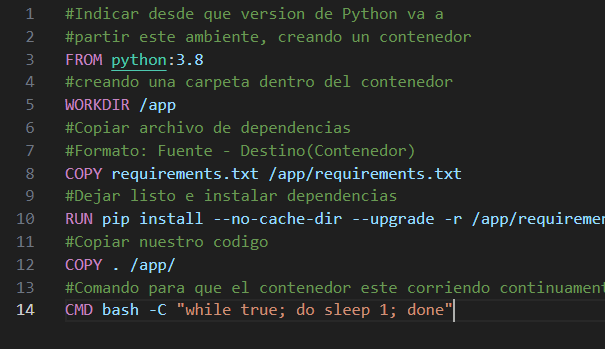

Una vez que hemos creado el archivo [Dockerfile](py-project/app/Dockerfile), procedemos a crear el archivo [docker-compose.yml](py-project/app/docker-compose.yml) y lo editamos.

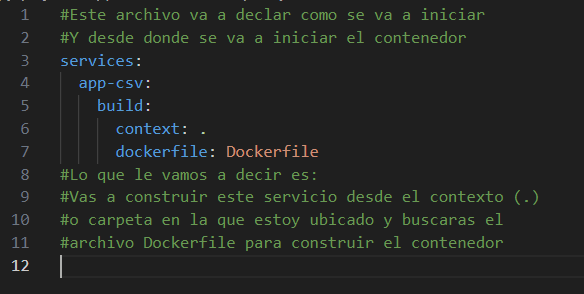

Veamos si funciona.

Corramos los siguientes comandos en terminal, pero primero tenemos que asegurarnos estar en la carpeta del proyecto

```bash
cd py-project/app/
#creando el contenedor
sudo docker-compose build
#lanzar contenedor
sudo docker-compose up -d
#ver estado de contenedor
sudo docker-compose ps  #Hay un contenedor corriendo
#Tenemos contenedor con módulos de python
#Entrar al contenedor para desarrollar
sudo docker-compose exec app-csv bash
```
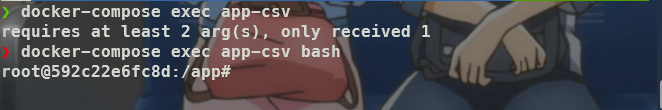

Ya estamos dentro del contenedor, es como si me estuviera dentro de un servidor unix, me deja en la carpeta app. Ingresamos el comando `ls -alh` y me enlista los archivos.

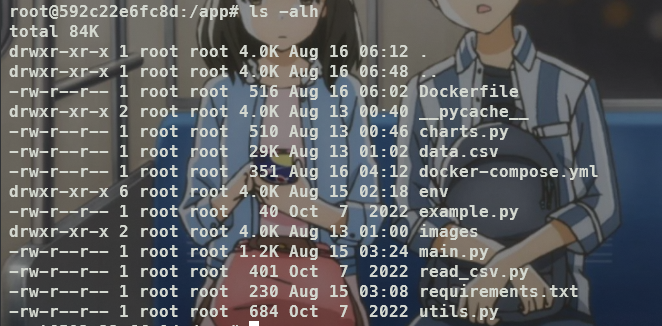

Empecemos a correr los archivos mediante la terminal.

```bash
#Correr nuestro código
python3 main.py
```

Corregir el [Dockerfile](py-project/app/Dockerfile). Una vez que lo corregimos, salimos del contenedor y lo volvemos a construir.

Ingresamos los siguientes comandos: 

```bash
#salir del contener
exit

#Reconstruir el contenedor nuevamente
docker-compose build    #La aplicación sigue online
#verificar estatus
docker-compose ps
#Tenemos que bajarlo antes preferentemente
docker-compose down
#Pero no lo hicimos y ya construimos la app
#volver a subirlo
docker-compose up -d
#volver a ingresar al contenedor
docker-compose exec app-csv bash
#verificando si tenemos el mismo error
ls -alh
```

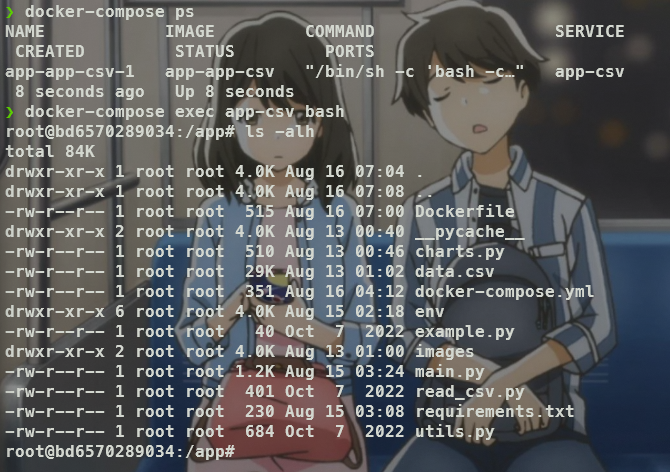

Ahora si tenemos de manera correcta los archivos sin subcarpetas. Corremos nuestro proyecto y podemos inicializar nuestro aplicación.

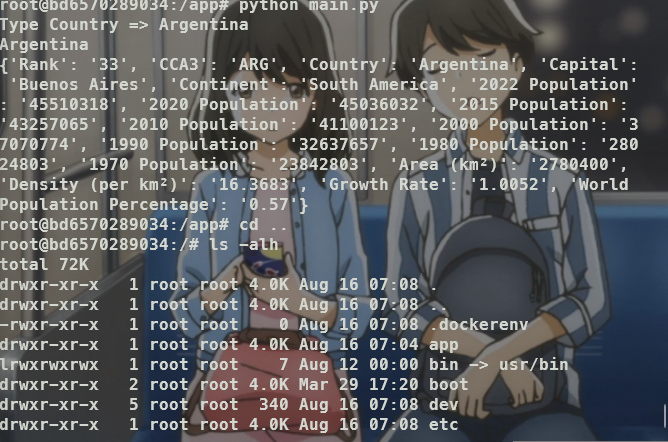

### Resumen
Logramos crear un entorno aislado con Docker para poder ejecutar nuestra aplicación, pudimos aislar una versión de Python y librerías sin necesidad de tener instalado Python en nuestra maquina. Esto es bastante util e importante ¿por qué? nosotros podemos aislar el desarrollo en una versión especifica con un lenguaje en especifico sin importar el sistema operativo que tengamos como equipo de trabajo, así no instalamos Python en la computadora. Así el desarrollo en diferentes lenguajes es mejor, ya que se pueden usar diferentes de manera aislada.

Como Python Developer es común usar los ambientes virtuales, pero puede que en alguna ocasiones el ambiente venga aislado en un contenedor de Docker o puede ser algún contenedor de otro lenguaje y de esta manera ya estamos familiarizados.

##### **Por ultimo hay un detalle que es fundamental para configurar en Docker si queremos tener una gran experiencia de desarrollo y este es que; cada vez que realicemos un cambio en los archivos no nos toque lanzar y volver a construir cada que se realice un cambio, existe una parte para enlazar la configuración de archivos y la vamos a ver en la siguiente clase**



## Extras

Para quienes están trabajando desde Ubuntu, puede que les aparezca un error a la hora de ejecutar "docker-compose build", En mi caso, se trataba de un error de permisos, pude solucionarlo al conceder los permisos usando:

"``docker run hello-world``" Para comprobar una correcta instalación y funcionamiento de Docker
¨``sudo ls -l /var/run/docker.sock``" Para confirmar cuales permisos tenemos y cuales no
"``sudo chmod 777 /var/run/docker.sock``" para confirmar todos los permisos
Espero que a alguien le sea de utilidad, literal estuve casi 2 días tratando de averiguar cuál era mi error


Aquí tienes un resumen de las 5 razones para dockerizar aplicaciones:

Portabilidad: Garantiza que la aplicación funcione igual en cualquier entorno.
Aislamiento: Evita conflictos entre aplicaciones y dependencias.
Despliegue y Escalabilidad: Facilita el despliegue rápido y la escalabilidad.
Eficiencia de Recursos: Optimiza el uso de recursos al ser más ligero que las máquinas virtuales.
Integración Continua: Mejora el proceso de CI/CD al automatizar pruebas y despliegues.